# **Traer archivo a Colab de forma local**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving MasDatosNu.csv to MasDatosNu.csv


# **Importar Librerías**

In [0]:
#Librería para manipulación y análisis de datos.
import pandas as pd    
#Librería de funciones matemáticas de alto nivel para operar con vectores y matrices.
import numpy as np    
#Librería para la generación de gráficos a partir de datos contenidos en listas o arrays.    
import matplotlib.pyplot as plt 
#Importamos los mapas de color de Matplotlib.
from matplotlib import colors  
#Librería de nivel superior a Matplotlib que permite generar fácilmente elegantes gráficos.
import seaborn as sb      

#dibuja imágenes estáticas en el cuaderno.
%matplotlib inline     
#Esto hace que el ancho de la figura sea de 16 de ancho y su altura de 14 pulgadas.       
plt.rcParams['figure.figsize'] = (16, 14) 
#Para crear gráficos declarativamente.
plt.style.use('ggplot') 
 
#Selección deL modelo, nos permite dividir un dataset en dos bloques (entrenamiento y test del modelo).
from sklearn.model_selection import train_test_split 
 #Crea un informe de texto que muestra las principales métricas de clasificación.
from sklearn.metrics import classification_report
#Calcula la matriz de confusión para evaluar la precisión de una clasificación dentro del modelo.
from sklearn.metrics import confusion_matrix 
#Implementa el algoritmo Gaussian Naive Bayes para la clasificación.  
from sklearn.naive_bayes import GaussianNB  
#Selecciona características de acuerdo con las k puntuaciones más altas.
from sklearn.feature_selection import SelectKBest 
#mapa de colores generado a partir de una lista de colores.
from matplotlib.colors import ListedColormap 


# **Cargar el Dataset (archivo .csv)**

In [2]:
#Leer el archivo de datos con encabezado y separados por punto y comas (csv) en DataFrame.
dataframe = pd.read_csv('MasDatosNu.csv', sep=';', index_col=0)  
dataframe.head(10)  #Esta función devuelve las primeras 10 filas del dataset.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48,80,1.020,1,0,1,1,0,0,121,36.0,1.2,135.0,4.7,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,5,90,1.015,1,0,1,1,0,0,224,16.0,0.7,138.0,3.2,8.1,23,5000,2.9,0,0,0,1,0,1,1
2,34,70,1.015,4,0,0,0,0,0,153,22.0,0.9,133.0,3.8,9.8,32,6900,3.4,0,0,0,1,1,0,1
3,75,70,1.025,1,0,1,1,0,0,158,49.0,1.4,135.0,4.7,11.1,39,8300,4.6,1,0,0,0,1,0,1
4,5,50,1.010,0,0,1,1,0,0,107,25.0,0.6,141.0,4.2,11.8,36,12400,4.2,0,0,0,1,0,0,1
5,8,50,1.020,4,0,1,1,0,0,95,46.0,1.0,135.0,3.8,9.8,32,6900,3.4,0,0,0,1,1,0,1
6,5,50,1.010,0,0,1,1,0,0,107,25.0,0.6,141.0,4.2,11.8,36,12400,4.2,0,0,0,1,0,0,1
7,73,90,1.010,1,4,0,0,1,0,234,56.0,1.9,133.0,3.9,10.3,28,6200,4.0,0,1,0,1,0,0,1
8,65,80,1.015,2,1,1,1,1,0,215,133.0,2.5,140.0,4.0,13.2,41,11200,3.7,0,1,0,1,0,0,1


# **Visualización de Datos**

In [3]:
print(dataframe.groupby('classification').size())  #Dividimos los datos en grupos aplicando algunas condiciones en los conjuntos de datos.

classification
0    140
1    154
dtype: int64


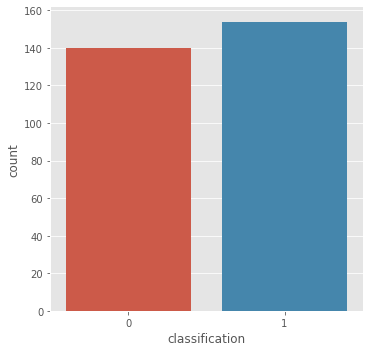

In [4]:
sb.catplot('classification',data=dataframe,kind="count", aspect=1) #Graficamos la variable dependiente.

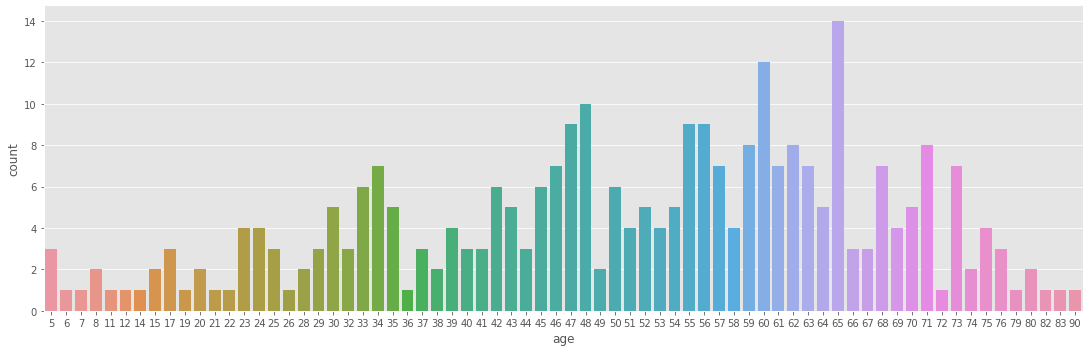

In [5]:
sb.catplot('age',data=dataframe,kind="count", aspect=3) #Graficamos la etiqueta edad.

# **Histograma de las características**

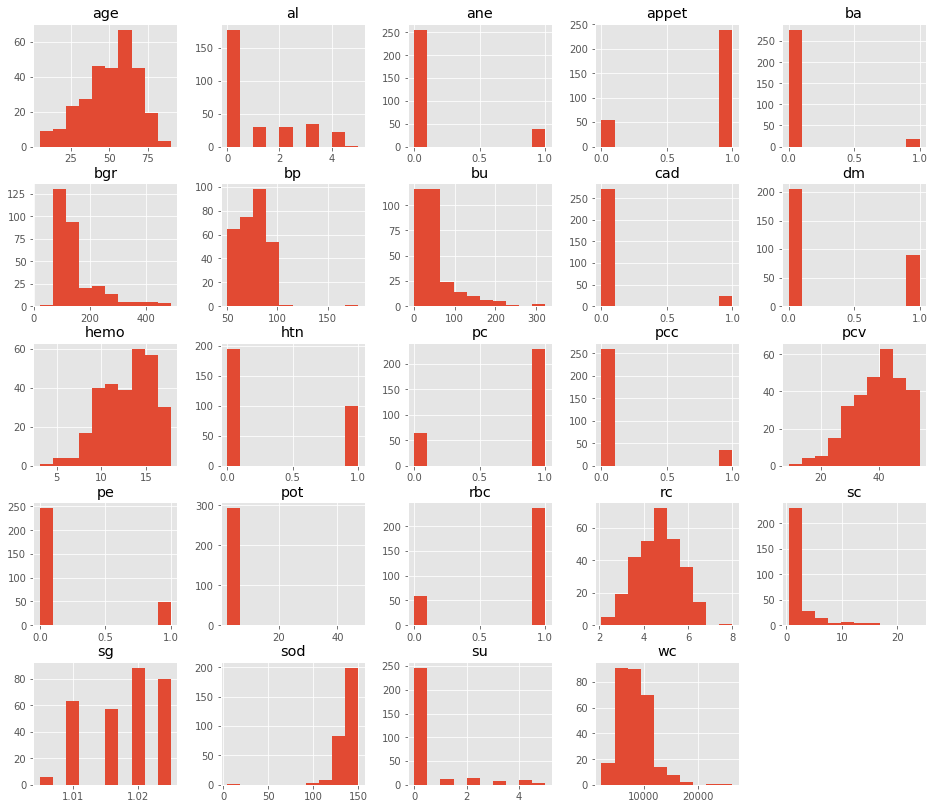

In [6]:

dataframe.drop(['classification'], axis=1).hist()   #Eliminamos la columna dependiente y trazamos los histogramas.
plt.show()       #función para mostrar los histogramas.

# **Resumen estadístico de los datos**

In [7]:
dataframe.describe() #visualizar detalles estadísticos.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,50.513605,75.782313,1.017942,0.962585,0.414966,0.802721,0.782313,0.115646,0.057823,145.183673,53.864286,2.510544,137.241837,4.493197,12.876531,39.343537,8406.462585,4.651020,0.336735,0.302721,0.078231,0.812925,0.163265,0.129252,0.523810
std,17.166465,13.521575,0.005792,1.378267,1.066675,0.398623,0.413377,0.320346,0.233807,76.926765,47.163357,3.428896,10.753397,2.592169,2.829530,8.821766,2978.843329,0.995133,0.473399,0.460219,0.268993,0.390636,0.370238,0.336050,0.500284
min,5.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.100000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,26.000000,0.800000,135.000000,3.825000,10.900000,33.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,120.000000,40.000000,1.200000,138.000000,4.300000,13.350000,41.000000,8000.000000,4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,63.000000,80.000000,1.025000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,158.750000,54.750000,2.400000,141.000000,4.900000,15.000000,45.750000,9800.000000,5.300000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,322.000000,24.000000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Feature Selection ó Selección de Características**

In [8]:
X=dataframe.drop(['classification'], axis=1) #La X representara nuestras columnas independientes.
y=dataframe['classification']  #La Y representa nuestra columna dependiente.
 
best=SelectKBest(k=6)   #Seleccionamos 6 características que más aportan.
X_new = best.fit_transform(X, y)  #Ajustamos a los datos, luego lo transformamos.
X_new.shape                       #Devuelve las dimensiones de la matriz.
selected = best.get_support(indices=True)  #Obtenemos un índice de las características seleccionadas.
print(X.columns[selected])  #Imprimimos las características seleccionadas.

Index(['sg', 'al', 'hemo', 'pcv', 'rc', 'htn'], dtype='object')


# **Grado de Correlación de las características que más aportan**

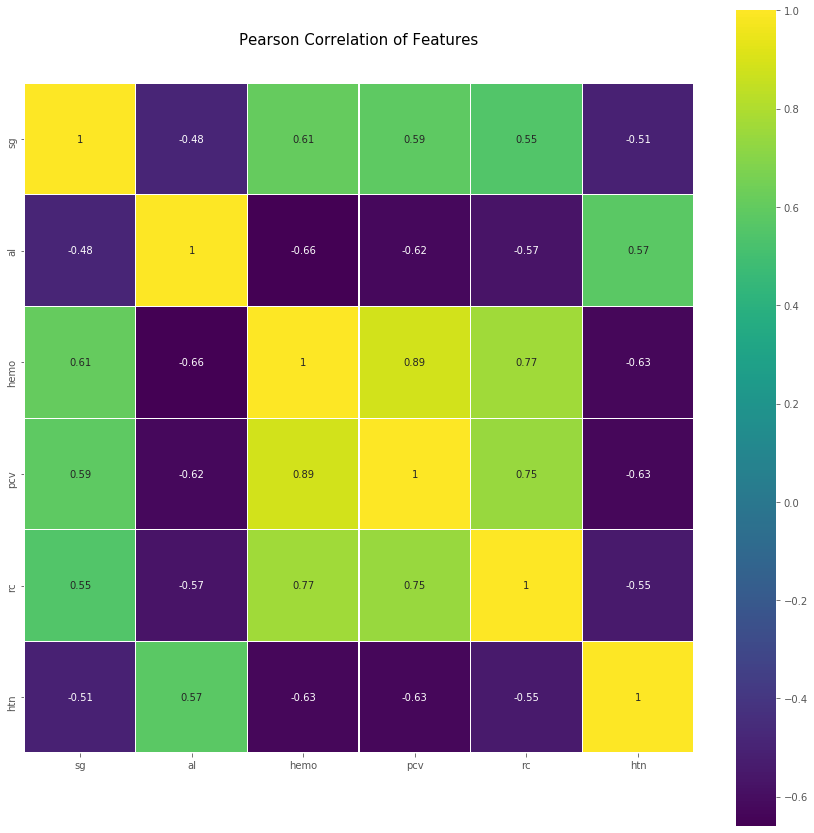

In [9]:
used_features =X.columns[selected] #Creamos una variable que almacenará las columnas con las características seleccionadas.

colormap = plt.cm.viridis  #Obtener mapa de colores RGBA.
plt.figure(figsize=(15,15))  #Asignamos el tamaño de visualización de la gráfica.
plt.title('Pearson Correlation of Features', y=1.05, size=15)  #Colocamos nombre a la gráfica.
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)  #Calculamos la correlación por pares de columnas y visualizamos los datos.


# **Crear el modelo Gaussian Naive Bayes con SKLearn**

**1. Dividimos nuestros datos de entrada en Entrenamiento y test**





In [0]:
#Decidimos el tamaño de los datos que se deben dividir como conjunto de datos de prueba
X_train, X_test = train_test_split(dataframe, test_size=0.3, random_state=6) 
y_train =X_train["classification"]
y_test = X_test["classification"]

**2. Entrenamos el modelo y obtenemos predicciones sobre nuestro conjunto de test**

In [11]:
# Instanciamos el clasificador
gnb = GaussianNB()  #La probabilidad de las características es gaussiana.
# Entrenando el clasificador
gnb.fit(
    X_train [used_features].values,
    y_train)
# Predicción del conjunto de prueba
y_pred = gnb.predict(X_test[used_features])

#Imprimimos el porcentaje de los resultados de entrenamiento y test
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))


Precisión en el set de Entrenamiento: 0.95
Precisión en el set de Test: 0.96


# **Evaluar el Modelo**

**Matriz de Confusión y reporte de métricas**



Reporte de Métricas
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.90      0.95        41

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89

Cantidad de errores de clasificación sobre un total de 89 casos: 4
Efectividad del algoritmo:  0.96


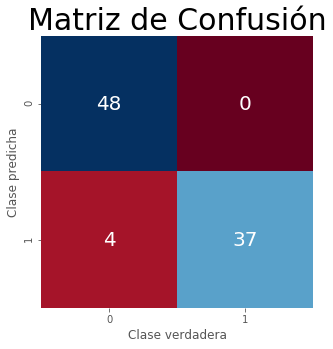

In [14]:
matriz = confusion_matrix(y_test, y_pred) 

# Graficamos la matriz de confusión
sb.heatmap(matriz, square=True, annot=True, fmt='d', cbar=False ,  annot_kws={'size':20} ,cmap = 'RdBu' )
plt.xlabel('Clase verdadera')
plt.ylabel('Clase predicha')
plt.title('Matriz de Confusión', size=30)
plt.rcParams['figure.figsize']=(5,5)
#plt.show()
print( '\n')
# Imprimimos el reporte de métricas
print('Reporte de Métricas')
print(classification_report(y_test, y_pred))

print("Cantidad de errores de clasificación sobre un total de {0} casos: {1}"
      .format(y_test.shape[0],(y_test != y_pred).sum()))
print("Efectividad del algoritmo: {0: .2f}"
      .format(1 - (y_test != y_pred).sum()/y_test.shape[0]))

# **Realizar predicciones en el Modelo creado**

**Resultado esperado**

*    **NotCKD = 0**
*   **CKD = 1**





In [13]:
#                  [sg', 'al',  'hemo',  'pcv',   'rc', 'htn']
print(gnb.predict([[1.02,  1,    15.4,    44,      5.2,   1],
                   [1.025, 0,    15.8,    53,      6.1,   0] ]))
 

[1 0]
